In [1]:
import bert_score
bert_score.__version__

'0.3.12'

In [2]:
import logging
import transformers
transformers.tokenization_utils.logger.setLevel(logging.ERROR)
transformers.configuration_utils.logger.setLevel(logging.ERROR)
transformers.modeling_utils.logger.setLevel(logging.ERROR)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams["xtick.major.size"] = 0
rcParams["xtick.minor.size"] = 0
rcParams["ytick.major.size"] = 0
rcParams["ytick.minor.size"] = 0

rcParams["axes.labelsize"] = "large"
rcParams["axes.axisbelow"] = True
rcParams["axes.grid"] = True

In [4]:
from bert_score import score

In [5]:
import os

# Gets the user's home directory
home_dir = os.path.expanduser("~")

# Constructs the path to the folder containing the different GPT descriptions for each model
documents_folder = os.path.join("C:\\Users\\User\\OneDrive\\Desktop\\Documents\\Summer Internship\\BERT Score Files\\All GPT Prompt Responses")

# Construct the full paths to the text files
actual_path = os.path.join(documents_folder, "All Actual Descriptions.txt")
translator_path = os.path.join(documents_folder, "All GPT Translator Responses.txt")

# Opens and reads the files assigning them to an index in a string array separated by two newline characters
def read_file_split_by_blank_lines(file_path):
    with open(file_path) as f:
        content = f.read()
    entries = [entry.strip() for entry in content.split('\n\n') if entry.strip()]
    return entries
refs = read_file_split_by_blank_lines(actual_path)
cands = read_file_split_by_blank_lines(translator_path)


In [6]:
print(len(refs))
print(len(cands))

25
25


In [7]:
P, R, F1 = score(cands, refs, lang='en', verbose=True)

calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 67.60 seconds, 0.37 sentences/sec


In [8]:
F1
#index 0 is the default GPT-4o score
#index 1 is the fine-tuned GPT-4o score

tensor([0.9401, 0.9153, 0.9207, 0.8880, 0.9445, 0.9450, 0.9248, 0.9615, 0.8929,
        0.9573, 0.8887, 0.8525, 0.8853, 0.8608, 0.8871, 0.8668, 0.8773, 0.8847,
        0.8951, 0.8505, 0.8677, 0.9004, 0.8563, 0.8437, 0.8361])

In [9]:
import torch
print(f"The Translator GPT on average was: {100 * torch.mean(F1):.2f} % accurate to the correct description.")

The Translator GPT on average was: 89.37 % accurate to the correct description.


In [10]:
import matplotlib.pyplot as plt

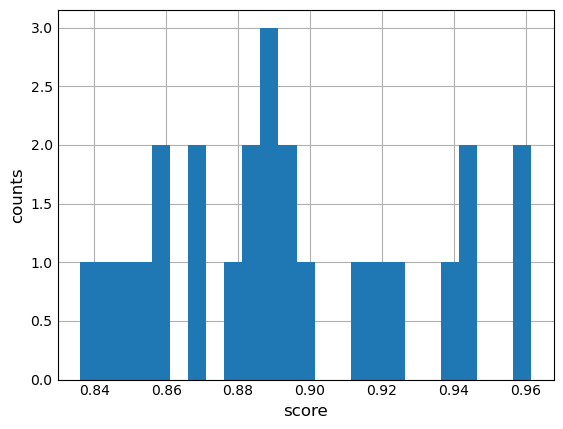

In [11]:
plt.hist(F1, bins=25)
plt.xlabel("score")
plt.ylabel("counts")
plt.show()

In [12]:
P_scaled, R_scaled, F1_scaled = score(cands, refs, lang='en', rescale_with_baseline=True)

tensor([0.6453, 0.4984, 0.5302, 0.3361, 0.6713, 0.6739, 0.5544, 0.7719, 0.3651,
        0.7472, 0.3404, 0.1263, 0.3206, 0.1754, 0.3313, 0.2110, 0.2732, 0.3170,
        0.3787, 0.1143, 0.2160, 0.4097, 0.1486, 0.0742, 0.0286])


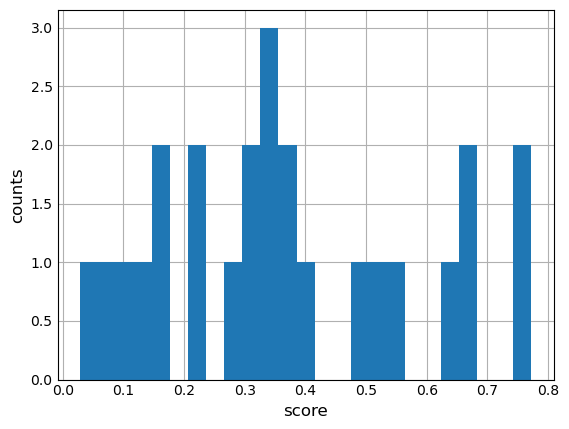

In [13]:
print(F1_scaled)
plt.hist(F1_scaled, bins=25)
plt.xlabel("score")
plt.ylabel("counts")
plt.show()

In [14]:
from bert_score import BERTScorer

In [15]:
scorer = BERTScorer(lang="en", rescale_with_baseline=True)

In [16]:
P, R, F1 = scorer.score(cands, refs)

In [17]:
F1

tensor([0.6453, 0.4984, 0.5302, 0.3361, 0.6713, 0.6739, 0.5544, 0.7719, 0.3651,
        0.7472, 0.3404, 0.1263, 0.3206, 0.1754, 0.3313, 0.2110, 0.2732, 0.3170,
        0.3787, 0.1143, 0.2160, 0.4097, 0.1486, 0.0742, 0.0286])